# Subtask VECTOR.3

Clustering embeddings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from gensim.models import KeyedVectors

In [2]:
# Load embeddings
wv = KeyedVectors.load("Standalone_01/output_embedding/config3.embeddings", mmap="r")

In [3]:
# https://github.com/RaRe-Technologies/gensim/blob/2feef89a24c222e4e0fc6e32ac7c6added752c26/gensim/models/keyedvectors.py
keys = wv.wv.key_to_index
embeddings_data= wv.wv[keys]
embeddings_data.shape

(26555, 100)

In [12]:
pca = PCA(n_components=2)
pca.fit(embeddings_data)
embeddings_pca = pca.transform(embeddings_data)
embeddings_pca.shape

(26555, 2)

In [35]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

kmeans = KMeans(n_clusters=3)
kmeans.fit(embeddings_pca)
y_kmeans = kmeans.predict(embeddings_pca)

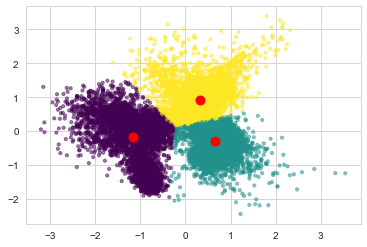

In [36]:
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=y_kmeans, s=10, alpha=0.5, cmap="viridis");
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=80);